## Importing Libraries for Dataset

In [1]:
import os
import tensorflow as tf
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import shutil
import os
import tensorflow as tf
import keras


## Train Test Split Datagenerator

In [4]:
TRAINING_DATA_DIR="C:/Users/asad/practice/Horse_Zebra_Filtered/train"
VALID_DATA_DIR="C:/Users/asad/practice/Horse_Zebra_Filtered/val"

In [2]:
IMAGE_SHAPE = (224,224) # (height, width) in no. of pixels

In [5]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False,)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
class_mode='categorical',
shuffle=True,
target_size=IMAGE_SHAPE)

Found 1008 images belonging to 3 classes.


In [6]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                featurewise_center=False, #set input mean to 0
                                                                samplewise_center=False,  #set each sample mean to 0
                                                                featurewise_std_normalization=False, #divide input datas to std
                                                                samplewise_std_normalization=False,  #divide each datas to own std
                                                                zca_whitening=False,  #dimension reduction
                                                                rotation_range=0.5,    #rotate 5 degree
                                                                zoom_range=0.5,        #zoom in-out 5%
                                                                width_shift_range=0.5, #shift 5%
                                                                height_shift_range=0.5,
                                                                horizontal_flip=True,  #randomly flip images
                                                                vertical_flip=False)
valid_generator = valid_datagen.flow_from_directory(
VALID_DATA_DIR,
class_mode='categorical',
shuffle=True,
target_size=IMAGE_SHAPE
)

Found 256 images belonging to 3 classes.


In [7]:
print(train_generator.class_indices)

{'donkey': 0, 'horse': 1, 'zebra': 2}


## Filter Libararies

In [9]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## Outliner Filter for 3 Classes

In [8]:
def outline(img, k = 9):
    
    k = max(k,9)
    kernel = np.array([[-1, -1, -1],
                       [-1,  k, -1],
                       [-1, -1, -1]])
    
    img_outline = cv2.filter2D(img, ddepth = -1, kernel = kernel)

    return img_outline

In [9]:
p1=cv2.imread("""C:/Users/asad/practice/Horse_zebra/train/donkey/donkey (105).jpg""")
p1= cv2.cvtColor(p1, cv2.COLOR_BGR2RGB)

In [10]:
outfilter=outline(p1,9)

In [15]:
#disp=Image.fromarray(outfilter)

Text(0.5, 1.0, 'Original')

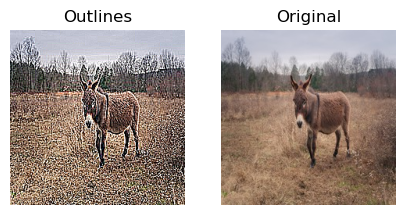

In [11]:
fig = plt.figure(figsize=(5,5)) 
fig.add_subplot(2,2,1)

plt.imshow(outfilter)
plt.axis("off")
plt.title("Outlines")

fig.add_subplot(2,2,2)

plt.imshow(p1)
plt.axis("off")
plt.title("Original")

In [12]:
p2=cv2.imread("""C:/Users/asad/practice/Horse_zebra/train/horse/horse (88).jpg""")
p2= cv2.cvtColor(p2, cv2.COLOR_BGR2RGB)

In [13]:
outfilter=outline(p2,9)

Text(0.5, 1.0, 'Original')

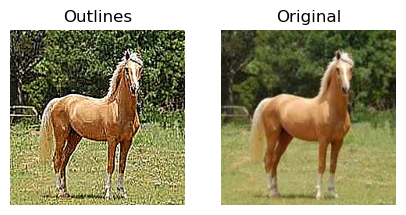

In [17]:
fig = plt.figure(figsize=(5,5)) 
fig.add_subplot(2,2,1)

plt.imshow(outfilter)
plt.axis("off")
plt.title("Outlines")

fig.add_subplot(2,2,2)

plt.imshow(p2)
plt.axis("off")
plt.title("Original")

## Canny With Blur

In [20]:
def blur_img(p3, k=9):
    blur = cv2.GaussianBlur(p3, (k,k), 0, 0)
    return blur

In [21]:
img_blur=blur_img(p3,5)
#(T, threshInv) = cv2.threshold(p3, 150, 300,cv2.THRESH_BINARY_INV)# Binarization of image
img_edges = cv2.Canny(img_blur, 200, 300)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


TypeError: Image data of dtype object cannot be converted to float

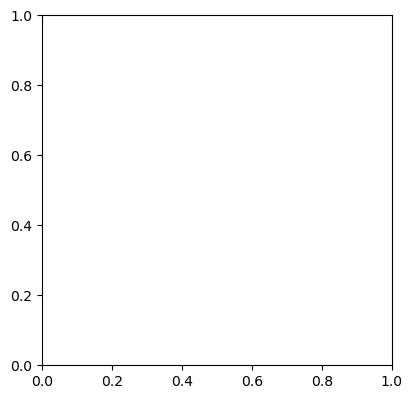

In [22]:
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(2, 2, 1)

plt.imshow(p3)
plt.axis("off")
plt.title("Original")

fig.add_subplot(2, 2, 2)
plt.imshow(img_edges)
plt.axis("off")
plt.title("Canny with blur")



In [23]:
 img_blur=blur_img(p2,1)
#(T, threshInv) = cv2.threshold(p3, 150, 300,cv2.THRESH_BINARY_INV)# Binarization of image
img_edges = cv2.Canny(img_blur, 200, 300)

Text(0.5, 1.0, 'Canny with blur')

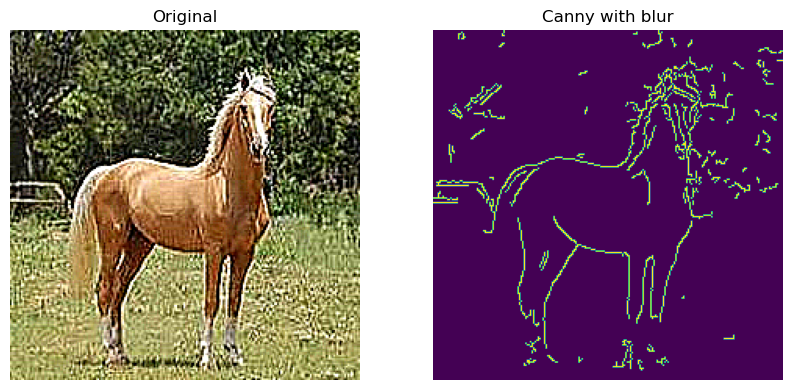

In [24]:
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(2, 2, 1)

plt.imshow(outfilter)
plt.axis("off")
plt.title("Original")

fig.add_subplot(2, 2, 2)
plt.imshow(img_edges)
plt.axis("off")
plt.title("Canny with blur")


In [25]:
def outline(img, k = 9):
    
    k = max(k,9)
    kernel = np.array([[-1, -1, -1],
                       [-1,  k, -1],
                       [-1, -1, -1]])
    
    img_outline = cv2.filter2D(img, ddepth = -1, kernel = kernel)

    return img_outline

In [26]:
outfilter=outline(p2,9)
img_edges = cv2.Canny(outfilter, 200, 300)

Text(0.5, 1.0, 'Outlines+Canny')

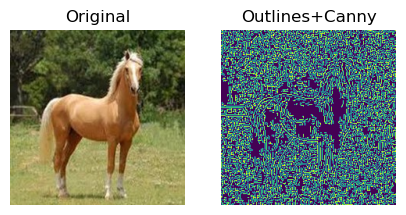

In [27]:
fig = plt.figure(figsize=(5,5)) 
fig.add_subplot(2,2,1)

plt.imshow(p2)
plt.axis("off")
plt.title("Original")


fig.add_subplot(2,2,2)
plt.imshow(img_edges)
plt.axis("off")
plt.title("Outlines+Canny")


In [28]:
 img_blur=blur_img(p1,1)
#(T, threshInv) = cv2.threshold(p3, 150, 300,cv2.THRESH_BINARY_INV)# Binarization of image
img_edges = cv2.Canny(img_blur, 200, 300)

Text(0.5, 1.0, 'Canny with blur')

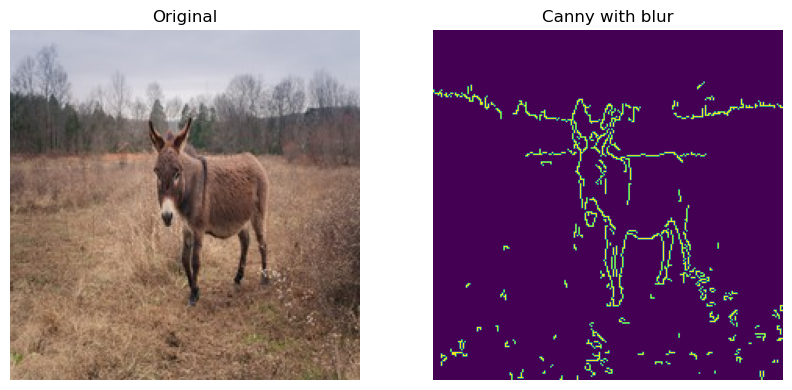

In [29]:
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(2, 2, 1)

plt.imshow(p1)
plt.axis("off")
plt.title("Original")

fig.add_subplot(2, 2, 2)
plt.imshow(img_edges)
plt.axis("off")
plt.title("Canny with blur")


## Inverted Filter

In [30]:
def invert(img):
    img_inv = cv2.bitwise_not(img)
    return img_inv

In [31]:
inv=invert(p1)

Text(0.5, 1.0, 'Inverted')

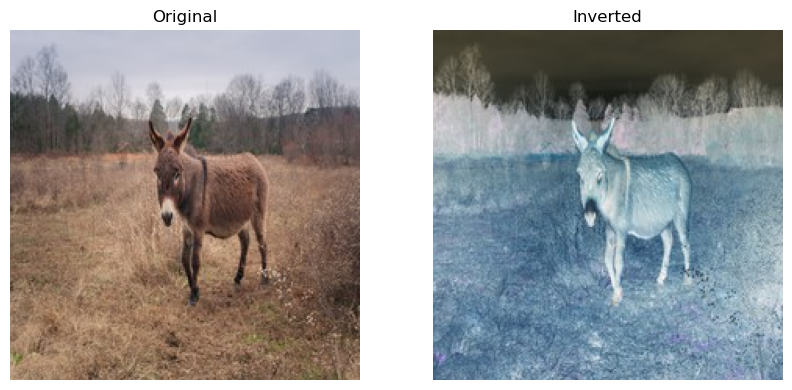

In [32]:
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(2, 2, 1)

plt.imshow(p1)
plt.axis("off")
plt.title("Original")

fig.add_subplot(2, 2, 2)
plt.imshow(inv)
plt.axis("off")
plt.title("Inverted")

## Applying Filters on Dataset

In [33]:
path = r"C:\Users\asad\practice\Horse_Zebra"
listofclass=os.listdir(path)

## Exposure Filter

In [34]:
def bright(img, level):
    img_bright = cv2.convertScaleAbs(img, beta = level)
    return img_bright

## Sharpening Filter

In [35]:
def sharping_filter(img, k=5):
    kernel = np.array([[ 0, -1,  0],
                       [-1,  k, -1],
                       [ 0, -1,  0]])
    img_sharp = cv2.filter2D(img, ddepth = -1, kernel = kernel)
    # Clip values to the range [0, 255].
    img_sharp = np.clip(img_sharp, 0, 255)
    return img_sharp

In [36]:
path1="C:/Users/asad/practice/Horse_Zebra_Filtered/"
directory = "Horse_Zebra_Filtered"

# Check if the directory already exists
for i in listofclass:
    if not os.path.exists(path1+i):
        # If not, create it
        os.makedirs(path1+i)
        print("Directory", i, "created successfully")
        path2 = "C:/Users/asad/practice/Horse_Zebra/"+i+'/'
        path3="C:/Users/asad/practice/Horse_Zebra_Filtered/"+i+'/'
        listofclass2=os.listdir(path2)
        # listofclass2
        for j in listofclass2:
             if not os.path.exists(path3+j):
                # If not, create it
                os.makedirs(path3+j)
                print("Directory", j, "created successfully")
             else:
                 print("Directory", j, "already exists")
        
       
    else:
        print("Directory", i, "already exists")

Directory train created successfully
Directory donkey created successfully
Directory horse created successfully
Directory zebra created successfully
Directory val created successfully
Directory donkey created successfully
Directory horse created successfully
Directory zebra created successfully


In [37]:
# listofclass
listofclass2

['donkey', 'horse', 'zebra']

In [38]:
for i in listofclass:
    name=os.listdir("C:/Users/asad/practice/Horse_Zebra/"+ i)
    # print("total numbers in ",name)
    for j in name:
        image=os.listdir("C:/Users/asad/practice/Horse_Zebra/"+i+'/'+j)
        for k in image:
            print('Filename',k)
            im=cv2.imread("""C:/Users/asad/practice/Horse_Zebra/"""+i+"/"+j+'/'+k)
            bri=bright(im,25)
            sharp=sharping_filter(bri,5)
            # img_edges = cv2.Canny(outfilter, 150, 300)
            cv2.imwrite("""C:/Users/asad/practice/Horse_Zebra_Filtered/"""+i+"/"+j+'/'+k,sharp)
            # print(im)
            # break
            # shutil.copyfile("""C:/Users/asad/practice/Horse_Zebra/"""+i+"/"+j+'/'+k,"C:/Users/asad/practice/Horse_Zebra_filtered/"+i+'/'+j+'/'+k)
        
     

Filename donkey (101).JPG
Filename donkey (102).jpg
Filename donkey (103).JPG
Filename donkey (104).jpg
Filename donkey (105).jpg
Filename donkey (106).jpg
Filename donkey (107).JPG
Filename donkey (108).jpg
Filename donkey (109).jpg
Filename donkey (110).jpg
Filename donkey (111).jpg
Filename donkey (112).jpg
Filename donkey (113).jpg
Filename donkey (114).jpg
Filename donkey (115).jpg
Filename donkey (116).jpg
Filename donkey (117).jpg
Filename donkey (118).jpg
Filename donkey (119).jpg
Filename donkey (120).jpg
Filename donkey (121).jpg
Filename donkey (122).jpg
Filename donkey (123).jpg
Filename donkey (124).jpg
Filename donkey (125).jpg
Filename donkey (126).jpg
Filename donkey (127).jpg
Filename donkey (129).jpg
Filename donkey (130).jpg
Filename donkey (131).jpg
Filename donkey (132).jpg
Filename donkey (133).jpg
Filename donkey (134).jpg
Filename donkey (135).jpg
Filename donkey (136).jpg
Filename donkey (137).jpg
Filename donkey (138).jpg
Filename donkey (139).jpg
Filename don

In [39]:
!pip install cv2filters
from cv2filters import Filters

In [107]:
filters=Filters()

In [108]:
image=cv2.imread("""C:/Users/asad/practice/Horse_zebra/train/donkey/donkey (417).jpg""")

In [109]:
type(image)

numpy.ndarray

In [88]:
# sobel_image = filters.sobel_filter(image,ksize=5)
# filtered_image = filters.bilateral_filter(image,d=9, sigma_color=75, sigma_space=75)
# dilated_image = filters.dilation(image,kernel=None, iterations=1)
# transformed_image = filters.perspective_transform(image, src_points, dst_points)
 # closed_image = filters.closing(image,kernel=None, iterations=2)
# highlighted_image = filters.highlight_box(image, (100, 70, 100, 70))
# resized_image = filters.resize_image(image, width=500, height=500)


True

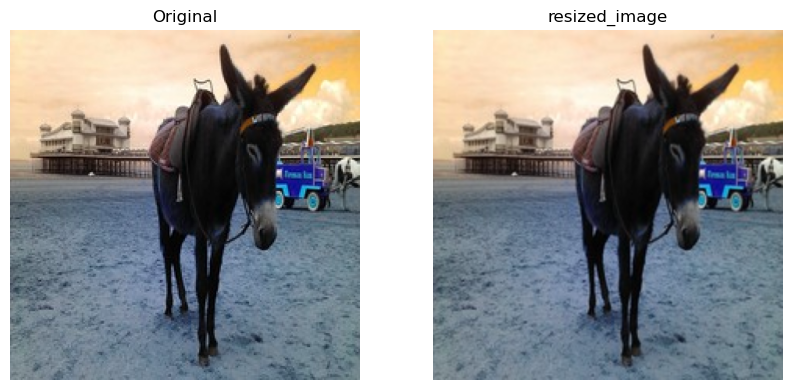

In [94]:
fig = plt.figure(figsize=(10,10)) 
fig.add_subplot(2, 2, 1)

plt.imshow(image)
plt.axis("off")
plt.title("Original")

fig.add_subplot(2, 2, 2)
plt.imshow(resized_image)
plt.axis("off")
plt.title("resized_image")
# cv2.imwrite("C:/Users/asad/practice/Horse_zebra/result.jpg",image)

In [10]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2,VGG16
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= ResNet50V2(include_top=False, pooling='avg', input_shape=(224,224,3))

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(3, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)




model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



94668760/94668760 [==============================] - 480s 5us/step


In [15]:

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=8)
history = model.fit(train_generator, validation_data=valid_generator, epochs=20, callbacks=callback).history

Epoch 1/20
32/32 [==============================] - 25s 646ms/step - loss: 0.6766 - accuracy: 0.6865 - val_loss: 0.3693 - val_accuracy: 0.8242
Epoch 2/20
32/32 [==============================] - 18s 565ms/step - loss: 0.4674 - accuracy: 0.7758 - val_loss: 0.3101 - val_accuracy: 0.8672
Epoch 3/20
32/32 [==============================] - 20s 616ms/step - loss: 0.4480 - accuracy: 0.8056 - val_loss: 0.2930 - val_accuracy: 0.8750
Epoch 4/20
32/32 [==============================] - 19s 589ms/step - loss: 0.3808 - accuracy: 0.8224 - val_loss: 0.3304 - val_accuracy: 0.8672
Epoch 5/20
32/32 [==============================] - 18s 566ms/step - loss: 0.3854 - accuracy: 0.8403 - val_loss: 0.3603 - val_accuracy: 0.8711
Epoch 6/20
32/32 [==============================] - 18s 562ms/step - loss: 0.4228 - accuracy: 0.8204 - val_loss: 0.3841 - val_accuracy: 0.8555
Epoch 7/20
32/32 [==============================] - 18s 562ms/step - loss: 0.3796 - accuracy: 0.8194 - val_loss: 0.2730 - val_accuracy: 0.8945

In [17]:
model.save("C:/Users/asad/practice/VGG16__donkey_horse_zebra_resnet50v2.h5")

## Make Prediction

In [18]:
# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224,224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224,224, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('C:/Users/asad/practice/download.jpg')
	# load model
	#model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result)


# entry point, run the example
run_example()

1/1 [==============================] - 3s 3s/step
[[0.0000000e+00 9.9994314e-01 5.6808902e-05]]


## Executing Model

In [20]:
model.evaluate(train_generator)

32/32 [==============================] - 14s 429ms/step - loss: 0.2403 - accuracy: 0.8909


[0.24025288224220276, 0.8908730149269104]